# Problem 6 Solution

The more general form of a first order Ordinary Differential Equation is: 
\begin{equation}
y^{'}=f(t,y).
\end{equation}
This can be solved analytically by integrating both sides but this is not straight forward for most problems.
Numerical methods can be used to approximate the solution at discrete points.


## Euler method

The simplest one step numerical method is the Euler Method named after the most prolific of mathematicians [Leonhard Euler](https://en.wikipedia.org/wiki/Leonhard_Euler) (15 April 1707 – 18 September 1783) .

The general Euler formula for the first order differential equation
\begin{equation}
y^{'} = f(t,y), 
\end{equation}

approximates the derivative at time point $t_i$,

\begin{equation}
y^{'}(t_i) \approx \frac{w_{i+1}-w_i}{t_{i+1}-t_{i}},
\end{equation}

where $w_i$ is the approximate solution of $y$ at time $t_i$.

This substitution changes the differential equation  into a __difference__ equation of the form 

\begin{equation}
\frac{w_{i+1}-w_i}{t_{i+1}-t_{i}}=f(t_i,w_i). 
\end{equation}

Assuming uniform stepsize $t_{i+1}-t_{i}$ is replaced by $h$, re-arranging the equation gives
\begin{equation} 
w_{i+1}=w_i+hf(t_i,w_i).
\end{equation}
 This can be read as the future $w_{i+1}$ can be approximated by the present $w_i$ and the addition of the input to the system $f(t,y)$ times the time step.


In [1]:
## Library
import numpy as np
import math 
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt # side-stepping mpl backend
import matplotlib.gridspec as gridspec # subplots
import warnings

warnings.filterwarnings("ignore")


## The Equation

\begin{equation}   \tau_m\frac{dV}{dt} = -(V-E_L) + R_mI(t), \ \ -50\leq t \leq 400, \end{equation}

where $E_L = -75$, $\tau_m = 10$,
$R_m = 10$ and $I(t)=0.01t$
and the initial condition
$V(-50) = -75$ using a stepsize of $h=0.5$.
    
    
## Discrete Interval
The continuous time $a\leq t \leq b $ is discretised with stepsize $h=0.5$ gives
\begin{equation} 
N=\frac{b-a}{h}.
\end{equation}
Here the N is $-50\leq t \leq 400$ 
\begin{equation}
 N=\frac{400--50}{0.5}=900,
\end{equation}
this gives the 901 discrete points:
\begin{equation}
 t_0=-400, \ t_1=-399.5, \ ... t_{900}=400. 
\end{equation}
This is generalised to 
\begin{equation}
t_i=-50+i0.1, \ \ \ i=0,1,...,900.
\end{equation}
The plot below shows the discrete time steps.

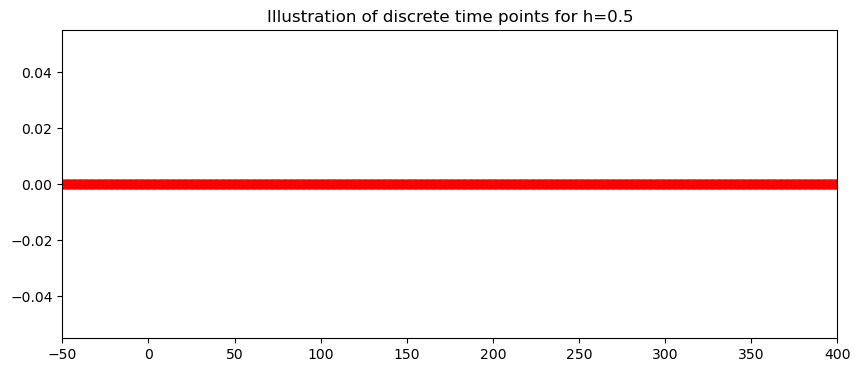

In [10]:
### Setting up time
a=-50
b=400
h=0.5


N=int((b-a)/(h))
time=np.arange(a,b+h/2,h)
fig = plt.figure(figsize=(10,4))
plt.plot(time,0*time,'o:',color='red')
plt.xlim((a,b))
plt.title('Illustration of discrete time points for h=%s'%(h))
plt.plot();

## Initial Condition
To get a specify solution to a first order initial value problem, an __initial condition__ is required.

The general intial condition is:
\begin{equation}
y(a)=A.
\end{equation}


## Specific Initial Condition
To get a specify solution to a first order initial value problem, an __initial condition__ is required.

For our population problem the intial condition is:
\begin{equation}
y(-50)=-75.
\end{equation

## Numerical approximation of an Initial Value Problem  
The differential equation is transformed using the Euler method into a difference equation of the form
\begin{equation} w_{i+1}=w_{i}+h f(t_i,w_i). \end{equation}
This approximates a series of of values $w_0, \ w_1, \ ..., w_{N}$.
 
## Numerical approximation of our Initial Value Problem  
The Integrate and fire differential equation is transformed using the Euler method into a difference equation of the form
\begin{equation} w_{i+1}=w_{i}+h\big[\frac{-(w_i-E_L) + R_mI(t_i)}{\tau_m}\big] \end{equation} 
for $i=0,1,...,899$ and
where $E_L = -75$, $\tau_m = 10$,
$R_m = 10$ and $I(t_i)=0.01t_i$
and the initial condition
$V(t_0=-50) = -75$ using a stepsize of $h=0.5$.
Putting in the values the difference equation is 
\begin{equation} w[i+1]=w[i]+0.5\big[-(w[i]--75) + 10*0.01*time[i]\big]/10 \end{equation} 
\begin{equation} \color{red}{w[i+1]}=\color{green}{w[i]}+0.5\big(-(\color{red}{w[i]}+75) + 0.1*time[i]\big)/10 \end{equation} 


In [11]:
w=np.zeros(N+1)
w[0]=-75 ## INITIAL CONDITION
for i in range (0,N):
## ADD EQUATION DYNAMICS TO EQUATION
    w[i+1]=w[i]+h*(-(w[i]+75)+0.1*time[i])/10

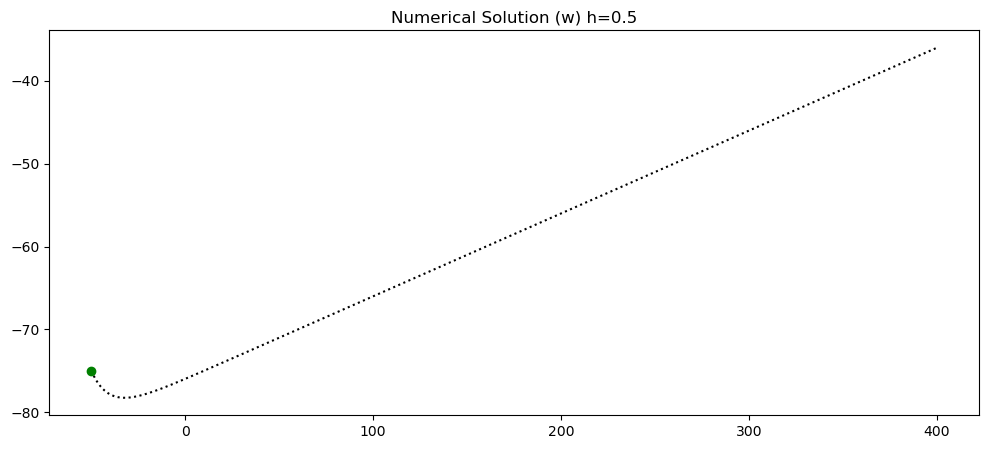

In [12]:
fig = plt.figure(figsize=(12,5))
# --- left hand plot

plt.plot(time,w,':',color='k')
plt.plot(time[0],w[0],'o',color='green')

#ax.legend(loc='best')
plt.title('Numerical Solution (w) h=%s'%(h))
plt.show()